In [1]:
import numpy as np
import pandas as pd


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!python -m wget $data


Saved under data (1).csv


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [7]:
cats = list(df.select_dtypes(include='object').columns)

In [8]:
%%time
for col in cats:
    df[col] = df[col].str.lower().str.replace(" ","_")

Wall time: 51 ms


In [9]:
%%time
df[cats] = df[cats].apply(lambda x: x.str.lower().str.replace(" ","_"))

Wall time: 53 ms


In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [12]:
for col in df.columns:
    print(col)
    print(df[col].sample(5))
    print()

make
10927       toyota
10956       toyota
2312     chevrolet
164            bmw
1037          audi
Name: make, dtype: object

model
11708                    xl7
6947                 montana
635      6_series_gran_coupe
460                     456m
10551       town_and_country
Name: model, dtype: object

year
1418    2016
9060    2009
1923    2015
5375    2015
9205    2015
Name: year, dtype: int64

engine_fuel_type
2804                  regular_unleaded
6533          flex-fuel_(unleaded/e85)
4198    premium_unleaded_(recommended)
1060    premium_unleaded_(recommended)
9320                  regular_unleaded
Name: engine_fuel_type, dtype: object

engine_hp
2033    185.0
160     248.0
2121    172.0
7703    121.0
9650    200.0
Name: engine_hp, dtype: float64

engine_cylinders
312     6.0
679     6.0
1296    6.0
8862    5.0
255     4.0
Name: engine_cylinders, dtype: float64

transmission_type
3419     automatic
6383        manual
10927    automatic
1588     automatic
11122    automatic
Name

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

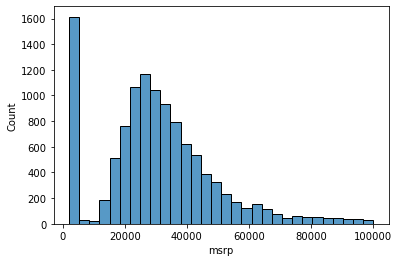

In [28]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 30)

In [31]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

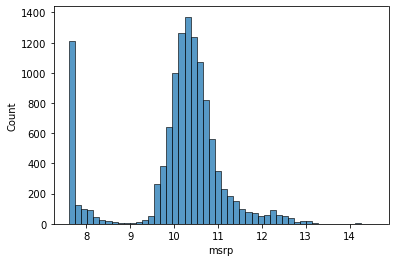

In [33]:
sns.histplot(price_logs, bins=50)

# Missing Values

In [34]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [40]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [53]:
df_shuffled = df.sample(frac=1,random_state=2)

In [54]:
df_val = df_shuffled.iloc[:n_val]
df_test = df_shuffled.iloc[n_val:n_val+n_test]
df_train = df_shuffled.iloc[n_val+n_test:]

In [57]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [59]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [60]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

In [77]:
w_new = [w0] + w

In [78]:
def dot (xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [79]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [80]:
linear_regression(xi)

9.312

In [81]:
w0 = 4.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [82]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])

# Vector form

array([ 9.38 , 10.552,  9.312])

In [84]:
def linear_regression(X):
    return X.dot(w_new)

In [85]:
linear_regression(X)

array([ 9.38 , 10.552,  9.312])

In [86]:
def train_linear_regression(X, y):
    pass

# Training a linear regression model

In [129]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [231, 24, 1385],
    [234, 25, 1631],
    [256, 11, 86],
    [654, 54, 1385],
    [122, 25, 2031],
    [115, 31, 86],
]

X = np.array(X)

In [102]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [104]:
X = np.column_stack([ones, X])

In [106]:
y = [100, 250, 565, 242, 256 ,346, 676, 351, 333]

In [107]:
XTX = X.T.dot(X)

In [108]:
XTX_inv = np.linalg.inv(XTX)

In [119]:
XTX_inv

array([[ 8.07594971e-01, -8.42866269e-04, -1.03382665e-02,
        -1.89395611e-04],
       [-8.42866269e-04,  5.77389370e-06, -4.90830600e-05,
         5.27916041e-07],
       [-1.03382665e-02, -4.90830600e-05,  1.32559395e-03,
        -9.57277205e-06],
       [-1.89395611e-04,  5.27916041e-07, -9.57277205e-06,
         2.64034728e-07]])

In [109]:
w_full = XTX_inv.dot(X.T).dot(y)

In [111]:
w0 = w_full[0]
w = w_full[1:]
w0,w

(157.97815580821842, array([ 0.74685958,  1.5690502 , -0.04107171]))

In [122]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 2.310e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 2.340e+02, 2.500e+01, 1.631e+03],
       [1.000e+00, 2.560e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 6.540e+02, 5.400e+01, 1.385e+03],
       [1.000e+00, 1.220e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.150e+02, 3.100e+01, 8.600e+01]])

In [130]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [131]:
train_linear_regression(X, y)

(157.97815580821842, array([ 0.74685958,  1.5690502 , -0.04107171]))

# Car price baseline model

In [138]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


In [139]:
num_cols = df_train.select_dtypes(exclude='object').columns

In [147]:
df_train = df_train.fillna(0)

In [148]:
X_train = df_train[num_cols]

In [150]:
w0, w = train_linear_regression(X_train, y_train)

In [153]:
y_pred =  w0+ X_train.dot(w)

<AxesSubplot:ylabel='Count'>

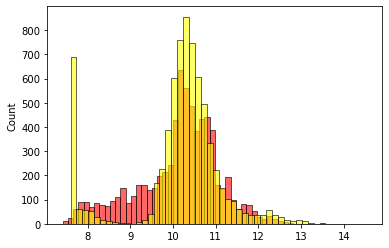

In [165]:
sns.histplot(y_pred, color='red', alpha= 0.6, bins=50)
sns.histplot(y_train,color='yellow', alpha= 0.6, bins=50)

# RMSE

In [170]:
def rmse(y, y_pred):
    se =  (y- y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [172]:
rmse(y_train, y_pred)

0.5134876533319513

# Validating the model

In [181]:
base = ['engine_hp','engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0+ X_train.dot(w)

In [182]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [183]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.7419381478118967

# Simple feature engineering

In [187]:
2017 - df_train.year

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [208]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [209]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.5222394405268985

<AxesSubplot:ylabel='Count'>

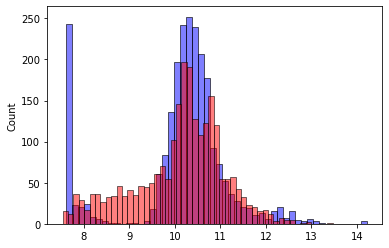

In [217]:
sns.histplot(y_val,color='blue', alpha= 0.5, bins=50)
sns.histplot(y_pred, color='red', alpha= 0.5, bins=50)


# Categorical variables

In [218]:
df_train.number_of_doors

0       4.0
1       4.0
2       3.0
3       2.0
4       4.0
       ... 
7145    3.0
7146    4.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [219]:
df_train.number_of_doors.unique()

array([4., 3., 2., 0.])

In [249]:
for v in [2,3,4]:
  del df_train['num_doors_%s' %v]
#     = (df_train.number_of_doors == v).astype('int')

KeyError: 'num_doors_2'

In [250]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,0,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,0,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,0,midsize,cargo_van,18,13,1385
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,0,large,wagon,22,15,1851
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,0,midsize,sedan,42,31,2202


In [255]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [269]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [257]:
X_train = prepare_X(df_train)

In [259]:
X_train

array([[162.,   4.,  26., ...,   0.,   0.,   1.],
       [175.,   4.,  36., ...,   0.,   0.,   1.],
       [132.,   4.,  35., ...,   0.,   1.,   0.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   1.],
       [174.,   4.,  42., ...,   0.,   0.,   1.],
       [256.,   6.,  27., ...,   0.,   0.,   1.]])

In [270]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.521013765682575

In [278]:
makes = list(df.make.value_counts().head(5).index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [279]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
        
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [280]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.5100789886284212

In [285]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,0,compact,wagon,26,19,1720,0,0,1
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,0,midsize,sedan,36,26,640,0,0,1
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0,1,0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1,0,0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,0,midsize,cargo_van,18,13,1385,0,1,0
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,0,0,1
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,0,large,wagon,22,15,1851,0,0,1
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,0,midsize,sedan,42,31,2202,0,0,1


In [322]:
categorical_variables = [
    'make', 'engine_fuel_type', 'engine_cylinders', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [353]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(2).index)

In [354]:
categories

{'make': ['chevrolet', 'ford'],
 'engine_fuel_type': ['regular_unleaded', 'premium_unleaded_(required)'],
 'engine_cylinders': [4.0, 6.0],
 'transmission_type': ['automatic', 'manual'],
 'driven_wheels': ['front_wheel_drive', 'rear_wheel_drive'],
 'market_category': ['crossover', 'flex_fuel'],
 'vehicle_size': ['compact', 'midsize'],
 'vehicle_style': ['sedan', '4dr_suv']}

In [355]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num
    return X

In [356]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.48361780445531755

In [357]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)
rmse(y_test, y_pred)

1.390456663900426

In [315]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_test)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

66.370116569617